# ローカルデータ

In [1]:
#SQLiteをインポート
import sqlite3

In [2]:
#自分の位置を確認
!pwd

/content


In [3]:
#パスを設定
path='/content/'
#DBファイル名を設定
db_name='local_data.sqlite'
#DBへ接続
con=sqlite3.connect(path+db_name)
#接続を閉じる
con.close()

In [4]:
#DBへ接続
con=sqlite3.connect(path+db_name)
#SQLを実行するためのオブジェクトの取得
cur=con.cursor()
#テーブルの作成
sql_create_table_local='CREATE TABLE local(Date date,Rising_time time,Retiring_time time);'
#SQLの実行
cur.execute(sql_create_table_local)
#接続を閉じる
con.close()

In [5]:
#DBへ接続
con=sqlite3.connect(path+db_name)
#SQLを実行するためのオブジェクトの取得
cur=con.cursor()
#データ入力のSQL
sql_insert_local="INSERT INTO local VALUES(?,?,?);"
#データリストの作成
local_list=[
    ('2023-12-20','7:00','23:00'),
    ('2023-12-21','5:30','23:01'),
    ('2023-12-22','5:30','23:07'),
    ('2023-12-23','5:00','23:23'),
    ('2023-12-24','7:30','23:41'),
    ('2023-12-25','7:00','23:02'),
    ('2023-12-26','7:30','22:30'),
    ('2023-12-27','5:30','23:00'),
    ('2023-12-28','8:00','23:45'),
    ('2023-12-29','7:00','23:15'),
    ('2023-12-30','7:00','23:43'),
    ('2023-12-31','8:00','23:06'),
    ('2024-01-01','7:00','23:03'),
    ('2024-01-02','7:00','23:04'),
    ('2024-01-03','7:00','23:30'),
    ('2024-01-04','8:00','23:22'),
    ('2024-01-05','8:00','23:50'),
    ('2024-01-06','5:00','23:13'),
    ('2024-01-07','7:00','23:19'),
    ('2024-01-08','7:00','23:26'),
    ('2024-01-09','7:30','23:08'),
]
#SQLの実行
cur.executemany(sql_insert_local,local_list)
#コミット
con.commit()
#接続を閉じる
con.close()

In [6]:
#DBへ接続
con=sqlite3.connect(path+db_name)
#SQLを実行するためのオブジェクトの取得
cur=con.cursor()
#データの参照
sql_select_local='SELECT * FROM local;'
#SQLの実行
cur.execute(sql_select_local)
#データの表示
for l in cur:
  print(l)
#接続を閉じる
con.close()

('2023-12-20', '7:00', '23:00')
('2023-12-21', '5:30', '23:01')
('2023-12-22', '5:30', '23:07')
('2023-12-23', '5:00', '23:23')
('2023-12-24', '7:30', '23:41')
('2023-12-25', '7:00', '23:02')
('2023-12-26', '7:30', '22:30')
('2023-12-27', '5:30', '23:00')
('2023-12-28', '8:00', '23:45')
('2023-12-29', '7:00', '23:15')
('2023-12-30', '7:00', '23:43')
('2023-12-31', '8:00', '23:06')
('2024-01-01', '7:00', '23:03')
('2024-01-02', '7:00', '23:04')
('2024-01-03', '7:00', '23:30')
('2024-01-04', '8:00', '23:22')
('2024-01-05', '8:00', '23:50')
('2024-01-06', '5:00', '23:13')
('2024-01-07', '7:00', '23:19')
('2024-01-08', '7:00', '23:26')
('2024-01-09', '7:30', '23:08')


# スクレイピング

In [7]:
from bs4 import BeautifulSoup
import requests

In [8]:
#URL
url='https://banno-clinic.biz/university-student-sleep/#:~:text=%E3%81%93%E3%81%AE%E7%B5%B1%E8%A8%88%E3%83%87%E3%83%BC%E3%82%BF%E3%81%8B%E3%82%89%E8%A8%88%E7%AE%97,%E5%88%86%E3%81%A8%E6%A6%82%E7%AE%97%E3%81%95%E3%82%8C%E3%81%BE%E3%81%99%E3%80%82'
#リクエスト
r = requests.get(url)

In [9]:
#情報の取得
html_soup=BeautifulSoup(r.text,'html.parser')
print(type(html_soup))

<class 'bs4.BeautifulSoup'>


In [10]:
#pタグの情報取得
p=html_soup.find_all("p",limit=13)
print(type(p))
print(p)

<class 'bs4.element.ResultSet'>
[<p class="author"><a href="/greeting/">日本睡眠学会専門医　阪野勝久</a></p>, <p>大学生になると、高校生の頃と比較して、生活スタイルが変わることが多くなります。<span class="bd-01">授業の時間割が多様化し、寮・下宿生活または一人暮らしが始まる人もいます。</span></p>, <p> </p>, <p class="quote-01">自動車免許が取得できるようになり行動範囲が広くなること、20歳を超えて飲酒が可能になることなど、生活面でも変化が訪れます。</p>, <p> </p>, <p>体力もあることから<span class="bd-01">夜更かし</span>が多くなり、寝不足が続く場合もあります。さらに、<span class="bd-01">一人暮らし</span>では、養育者による注意が行き届かないので、<span class="bd-01">生活リズムが不規則になる学生もいます。</span></p>, <p> </p>, <p>今回は、大学生になる人が知っておきたい睡眠時間の重要性を学びましょう。</p>, <p> </p>, <p>年齢層による違い、病気との関係について。</p>, <p> </p>, <p><span class="bd-02">内閣府</span>が調査した報告によれば、<span class="bd-01">20～24歳までの年齢</span>では、平均就寝時刻が0時31分でした。一方、平均起床時刻は7時56分でした。この統計データから計算すると、<span class="bd-01">大学生の年齢層において、平均の睡眠時間は7時間25分と概算されます。</span></p>, <p> </p>]


# オープンデータ

In [11]:
#パスの設定
path='/content/'
#DBファイル名を設定
db_name='open_data.sqlite'
#DBへ接続
con=sqlite3.connect(path+db_name)
#接続を閉じる
con.close()

In [12]:
#DBへ接続
con=sqlite3.connect(path+db_name)
#SQLを実行するためのオブジェクトの取得
cur=con.cursor()
#テーブルの作成
sql_create_table_open='CREATE TABLE open(Average_risnig_time time,Average_retiring_time time);'
#SQLの実行
cur.execute(sql_create_table_open)
#接続を閉じる
con.close()

In [13]:
#DBへ接続
con=sqlite3.connect(path+db_name)
#SQLを実行するためのオブジェクトを取得
cur=con.cursor()
#データの入力
sql_insert_open="INSERT INTO open VALUES ('7:56','0:31');"
#SQLの実行
cur.execute(sql_insert_open)
#コミット
con.commit()
#接続を閉じる
con.close()

In [14]:
#DBへ接続
con=sqlite3.connect(path+db_name)
#SQLを実行するためのオブジェクトを取得
cur=con.cursor()
#データの参照
sql_select_open='SELECT * FROM open;'
#SQLの実行
m=cur.execute(sql_select_open)
#データの表示
for m in cur:
  print(m)
#接続を閉じる
con.close()

('7:56', '0:31')


# 可視化

In [47]:
#pandasとmatplotlibをインポート
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
#csvの読み込みと表示
df=pd.read_csv('/content/dsp_final_local .csv')
df

,date,time_1,time_2
0,12/20,7:00,23:00
1,12/21,5:30,23:01
2,12/22,5:30,23:07
3,12/23,5:00,23:23
4,12/24,7:30,23:41
5,12/25,7:00,23:02
6,12/26,7:30,22:30
7,12/27,5:30,23:00
8,12/28,8:00,23:45
9,12/29,7:00,23:15


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('time_1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time_1')):
  _plot_series(series, series_name, i)
  fig.legend(title='time_1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time_1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time_1'}, axis=1)
              .sort_values('time_1', ascending=True))
  xs = counted['time_1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time_1', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time_1')):
  _plot_series(series, series_name, i)
  fig.legend(title='time_1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_1')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time_2']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time_2'}, axis=1)
              .sort_values('time_2', ascending=True))
  xs = counted['time_2']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time_2', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time_1')):
  _plot_series(series, series_name, i)
  fig.legend(title='time_1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_2')
_ = plt.ylabel('count()')

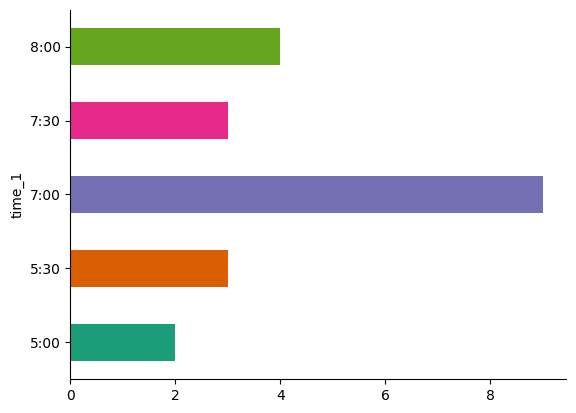

In [51]:
#1つ前のセルの実行結果からグラフを描画する機能を使った(自分でもコードを書いてみたのですが、全く綺麗に描画できなかったのでこの機能を使いました)
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('time_1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

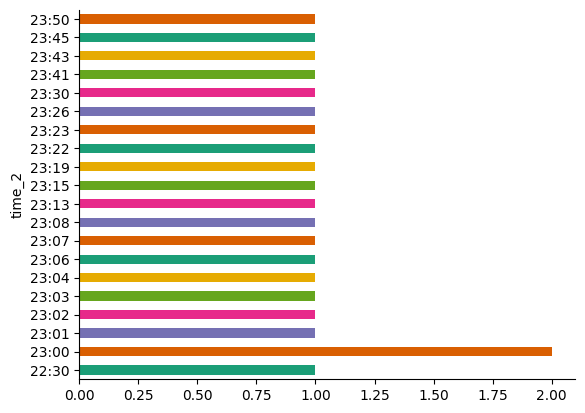

In [52]:
#前とセルと同様の機能を使用してtime_2のグラフを描画
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('time_2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# 結果と考察

20~24歳の平均の起床時間、就寝時間と自分自身の睡眠に関するデータを比較すると、自分は早寝早起きの方に分類されるのではないかと考えられる。また、起床時間はある程度決まった時間帯に集中しているのに対し、就寝時間は分散していた。これらの結果の考察として、早朝のアルバイトや大学の1限の授業に間に合うように目覚ましをかけていたり、就寝時間を決めていないためだと考えられる。就寝時間も決めることでしっかりとした睡眠時間を確保でき、健康的な生活リズムを作ることができるのではないかと考えた。

# その他

資料：大学生の理想の睡眠時間が分かります | 阪野クリニック
https://banno-clinic.biz/university-student-sleep/#:~:text=この統計データから計算,分と概算されます%E3%80%82
(参照:2024-01-14) (更新:2023-01-16)

協力:横山広樹(学籍番号:2322106)